# Bootstrap Distributions

# 1. Introduction to bootstrapping

<b>1.1 Principles of bootstrapping</b>

Bootstrapping is, in some sense, the opposite of sampling from a population. Sampling treats your dataset as the population, and you generate a random subset. Bootstrapping treats your dataset as a sample and uses it to build up a theoretical population.

The bootstrapping workflow is to generate a resample of the same size as the population, calculate a summary statistic, then repeat this to get a distribution of summary statistics.

<b>1.2 With or without replacement?</b>

So far in the course, you've seen sampling with and without replacement. It's important to know when to use each method.

The key to deciding whether to sample without or with replacement is whether or not your dataset is best thought of as being the whole population or not.

<b>1.3 Generating a bootstrap distribution</b>

The process for generating a bootstrap distribution is similar to the process for generating a sampling distribution; only the first step is different.

To make a sampling distribution, you start with the population and sample without replacement. To make a bootstrap distribution, you start with a sample and sample that with replacement. After that, the steps are the same: calculate the summary statistic that you are interested in on that sample/resample, then replicate the process many times. In each case, you can visualize the distribution with a histogram.

Here, spotify_sample is a subset of the spotify_population dataset. To make it easier to see how resampling works, a row index column called 'index' has been added, and only the artist name, song name, and danceability columns have been included.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
spotify_pop = pd.read_feather('C:\\Users\\yazan\\Desktop\\Data_Analytics\\8-Sampling in Python\\Datasets\\spotify_2000_2020.feather')
print(spotify_pop.head())

spotify_sample = spotify_pop[['artists', 'name', 'danceability']]
spotify_sample = spotify_sample.reset_index()
print('\n')
print(spotify_sample.head())

   acousticness          artists  danceability  duration_ms  duration_minutes  \
0       0.97200  ['David Bauer']         0.567     313293.0          5.221550   
1       0.32100   ['Etta James']         0.821     360240.0          6.004000   
2       0.00659    ['Quasimoto']         0.706     202507.0          3.375117   
3       0.00390  ['Millencolin']         0.368     173360.0          2.889333   
4       0.12200   ['Steve Chou']         0.501     344200.0          5.736667   

   energy  explicit                      id  instrumentalness   key  liveness  \
0   0.227       0.0  0w0D8H1ubRerCXHWYJkinO          0.601000  10.0     0.110   
1   0.418       0.0  4JVeqfE2tpi7Pv63LJZtPh          0.000372   9.0     0.222   
2   0.602       1.0  5pxtdhLAi0RTh1gNqhGMNA          0.000138  11.0     0.400   
3   0.977       0.0  3jRsoe4Vkxa4BMYqGHX8L0          0.000000  11.0     0.350   
4   0.511       0.0  4mronxcllhfyhBRqyZi8kU          0.000000   7.0     0.279   

   loudness  mode         

In [14]:
'''Generate a single bootstrap resample from spotify_sample'''

# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Print the resample
print(spotify_1_resample.head())

       index                                artists  \
33007  33007  ['Lil Uzi Vert', 'Pharrell Williams']   
2819    2819                           ['Bon Jovi']   
30491  30491      ['Maribou State', 'Holly Walker']   
9983    9983                              ['Drake']   
26300  26300           ['Dirty Heads', 'Matisyahu']   

                                                  name  danceability  
33007              Neon Guts (feat. Pharrell Williams)         0.859  
2819   (You Want To) Make A Memory - Pop Album Version         0.510  
30491                                           Tongue         0.569  
9983                               30 for 30 Freestyle         0.744  
26300                                  Dance All Night         0.706  


In [15]:
'''Calculate the mean of the danceability column of spotify_1_resample using numpy'''

# Calculate mean danceability of resample
mean_danceability_1 = np.mean(spotify_1_resample['danceability'])

# Print the result
print(mean_danceability_1)

0.5908861892644517


In [16]:
'''Replicate the expression provided 1000 times'''

# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)
  
# Print the result
print(mean_danceability_1000[:10])

[0.5909711806222392, 0.5909784448818898, 0.592065536777415, 0.5912172052045325, 0.591320981371231, 0.5924425532936431, 0.5904919171307855, 0.5917577083733435, 0.59083806894565, 0.5920705996735164]


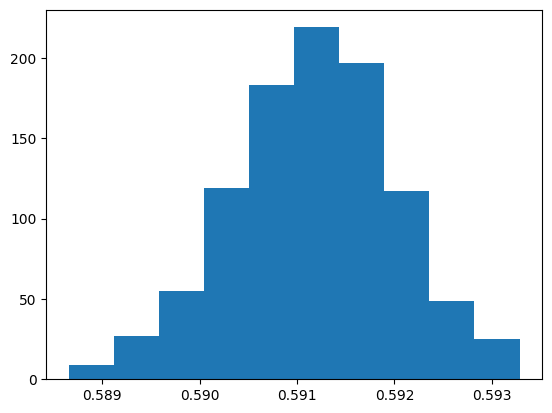

In [17]:
'''Create a bootstrap distribution by drawing a histogram of mean_danceability_1000'''

# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

From the smaller sample of Spotify songs, we can estimate the mean danceability statistic in the population. Since we have a distribution of statistics, we can even quantify how accurate our estimate is.

# 2. Comparing sampling and bootstrap distributions 

<b>2.1 Bootstrap statistics and population statistics</b>

Bootstrap distribution statistics can be used to estimate population parameters. But can you always rely on them to give an accurate estimate of an unknown population parameter?

Should the mean and the standard deviation of the bootstrap distribution both be used to estimate the corresponding values of the population?

- No, the standard deviation of the bootstrap distribution divided by the square root of the sample size will tend to be near the sample standard deviation, which may not necessarily be very close to the population standard deviation.

- Yes, both estimates should match up closely with the population values in all scenarios.

- No, the mean of the bootstrap distribution will always be near the sample mean, which may not necessarily be very close to the population mean.    (True)

- Yes, the variability of the sample, the population, the bootstrap distribution, and the sampling distribution will all be similar regardless of the sample size selected.